In [ ]:
from Utils import get_embeddings, login_Hugging_for_tokenizer_model
import torch

In [ ]:
tokenizer, model = login_Hugging_for_tokenizer_model()

def smiles_to_embeddings(smiles, tokenizer=tokenizer, model=model):
    return get_embeddings(tokenizer, model, smiles)

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: fineGrained).
Your token has been saved to C:\Users\Yang\.cache\huggingface\token
Login successful


In [ ]:
smiles = "NCCCC"

# Get the embeddings
embedding = smiles_to_embeddings(smiles)

# Print or use the embedding as needed
print(embedding.shape)

torch.Size([1, 7, 384])


In [ ]:
from transformers import AutoModel, AutoTokenizer

def get_smiles_embedding(smiles, model_version='DeepChem/ChemBERTa-77M-MTR', max_length=128):
    model = AutoModel.from_pretrained(pretrained_model_name_or_path=model_version, output_attentions=True) # Load ChemBERT model
    tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name_or_path=model_version) # Load ChemBERT tokenizer
    # Build tokenizer with same padding as in training
    tokens = tokenizer(
                smiles,
                max_length=max_length,
                padding="max_length",
                truncation=True,
                return_tensors="pt"
            )

    # Get the embeddings from CLS token
    with torch.no_grad():
        emb = model(
            tokens["input_ids"],
            tokens["attention_mask"]
        )["last_hidden_state"][:, 0, :].numpy()
    
    return emb


[[-0.24266241  0.30873424  0.04592807  0.25971904 -0.2327013   0.03468586
   0.25395554 -0.09177838  0.18316105 -0.2616902  -0.2962829  -0.07542133
   0.07019384 -0.09132029 -0.08019534 -0.00945247 -0.3274298  -0.32247984
  -0.0842604   0.11031325  0.3336127  -0.00563066  0.01571712 -0.301354
  -0.24270968 -0.20475972 -0.1421593   0.23083301 -0.03602657 -0.0107397
   0.04983145  0.15676363  0.02868942  0.04773795  0.26598844  0.09794639
   0.07370745  0.09912263  0.06953901 -0.17010204  0.04149458  0.20518687
   0.06785604  0.06076902  0.0584873  -0.12422742 -0.02947365 -0.11834992
  -0.10592988 -0.01037932 -0.03798876  0.23551685 -0.07751242 -0.24929836
  -0.0463852   0.12985167 -0.22289795 -0.1335349   0.04594678 -0.28542638
  -0.27348894 -0.10488877  0.14732462 -0.09155297 -0.03746787 -0.10174252
  -0.21891917  0.20941682  0.28171122  0.06663831 -0.03003342 -0.15222865
  -0.16352792 -0.05705269 -0.27509323 -0.2041312   0.08902555 -0.1255533
   0.05932727  0.0767987  -0.10255975 -0.0

# Data

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
def profile_data(profile_path):
    with open(profile_path, 'r') as f:
        lines = f.readlines()
    sigmas = []
    for line in lines:
        sigmas.append(float(line.split()[1]))
        
    return sigmas

In [3]:
def list_files(directory_path):
    try:
        # List all files and directories in the specified directory
        file_list = os.listdir(directory_path)
        
        # Filter out only the files (not directories)
        files = [f for f in file_list if os.path.isfile(os.path.join(directory_path, f))]
        
        return files
    except FileNotFoundError:
        return f"The directory {directory_path} does not exist."
    except Exception as e:
        return f"An error occurred: {e}"

In [8]:
index_path = r'C:\Users\Yang\Desktop\113-1\cosmo_profile\profile_index_VT2005_v2.csv'
profile_dir_path = r'C:\Users\Yang\Desktop\113-1\cosmo_profile\COSMOSAC\profiles\VT2005\Sigma_Profiles_v2'
profile_data_list = list_files(profile_dir_path)

In [5]:
df = pd.read_csv(index_path)
df_clean = df.dropna(subset=['CanSMILES'])
ids = df_clean['Index No.']
smiles = df_clean['CanSMILES']
Vcosmo = df_clean['Vcosmo, A3']
data_df = pd.DataFrame({'id':ids, 'smiles': smiles, 'Vcosmo': Vcosmo})

In [30]:
# df.loc[df['CanSMILES']==smiles, 'Index No.']

2    3
Name: Index No., dtype: int64


In [6]:
data_df = pd.DataFrame({'id':ids, 'smiles': smiles, 'Vcosmo': Vcosmo})

In [9]:
for txt_data in profile_data_list:
    id = int(txt_data.split('-')[1])
    profile_path = f'{profile_dir_path}//{txt_data}'
    sigmas = profile_data(profile_path)
    
    arr = np.arange(-2.5, 2.51 ,0.1)
    for i, p in enumerate(arr):
        data_df.loc[data_df['id']==id, str(round(p,2))] = sigmas[i]
        


In [10]:
data_df

,id,smiles,Vcosmo,-2.5,-2.4,-2.3,-2.2,-2.1,-2.0,-1.9,...,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5
0,1,C,37.95554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,CC,58.80969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,CCC,80.70296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,CC(C)C,103.40846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,CCCC,102.43321,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1427,1733,CCCCCCCCCCC1CCCC1,329.15058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1428,1734,CCCCCCCCCCCCC1CCCC1,372.28100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1429,1735,CCCCCCCCCCCCCC1CCCC1,394.77882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1430,1736,CCCCCCCCCCCCCCC1CCCC1,415.06982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
len(data_df)

1431

In [14]:
data_df.to_csv('VT2005_data_for_training.csv', index=False)

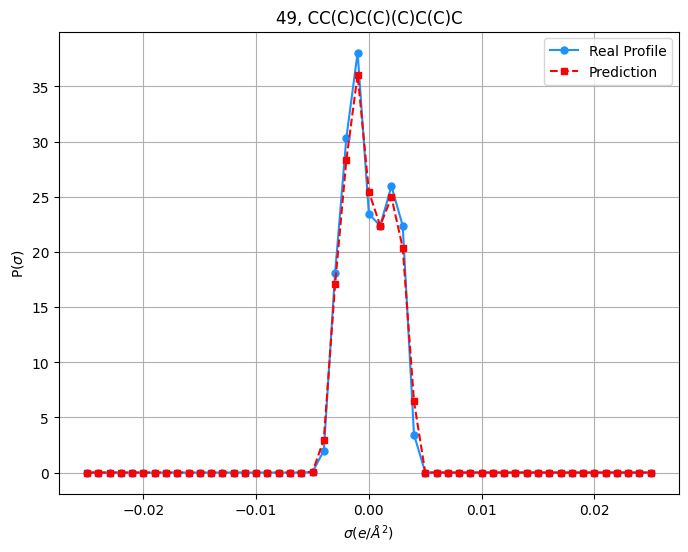

In [39]:
import numpy as np
import matplotlib.pyplot as plt

id = 49
smiles = 'CC(C)C(C)(C)C(C)C'
sigma_profile = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
    0.046093384, 1.986939194, 18.06833193, 30.33992184, 38.07898658, 
    23.43659207, 22.38612878, 25.96913151, 22.36640292, 3.444651791, 
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
]

prediction = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
    0.056093384, 2.986939194, 17.06833193, 28.33992184, 36.07898658, 
    25.43659207, 22.38612878, 24.96913151, 20.36640292, 6.444651791, 
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
]

def plot_sigma_profile(sigma_profile, prediction, smiles, id=None):
    density = np.round(np.arange(-0.025, 0.0251, 0.001), 4)

    plt.figure(figsize=(8, 6))
    plt.plot(density, sigma_profile, marker='o', linestyle='-', color='dodgerblue', markersize=5, label='Real Profile')
    plt.plot(density, prediction, marker='s', linestyle='--', color='r', markersize=5, label='Prediction')

    plt.xlabel(r'$\sigma(e/\AA^2)$')
    plt.ylabel(r'P($\sigma$)')
    if id:
        plt.title(f'{id}, {smiles}')
    else:
        plt.title(smiles)
    plt.grid(True)
    plt.legend()

    plt.show()

plot_sigma_profile(sigma_profile, prediction, smiles, id)

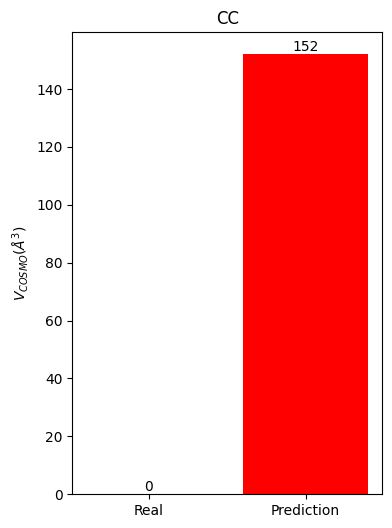

In [58]:
def plot_V_cosmo(smiles, real, prediction):
    plt.figure(figsize=(4, 6))
    
    if not real:
        real = 0
        
    labels = ['Real', 'Prediction']
    V_cosmo = [real, prediction]

    bars = plt.bar(labels, V_cosmo, color=['dodgerblue', 'red'], width=0.8)

    plt.ylabel(r'$V_{COSMO}(\AA^3)$')
    plt.title(smiles)

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
    
    plt.show()

plot_V_cosmo('CC', None, 152)